In [244]:
#import dependencies
import statsmodels.api as sm
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

%matplotlib inline

In [279]:
#weekly gas prices in San Francisco Area
#read csv 
weekly_gas_prices = pd.read_csv("Resources/weekly_gas_prices_ca_2.csv")

#rename column 
#weekly_gas_prices = weekly_gas_prices.rename(columns={'Weekly San Francisco All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)':'Price'})

#preview data
weekly_gas_prices.head()

weekly_gas_prices = weekly_gas_prices.set_index("Date")
weekly_gas_prices = weekly_gas_prices.dropna()
weekly_gas_prices_1314 = weekly_gas_prices.loc["2013-09-06":"2014-09-08",:]
weekly_gas_prices_1314.count()

Price    52
dtype: int64

In [280]:
#weekly_gas_prices.index

In [281]:
#save the gas price values into a list
gas_array = weekly_gas_prices_1314["Price"].values
gas_list = np.ndarray.tolist(gas_array)
len(gas_list)

52

In [282]:
#connect to Google
pytrends = TrendReq(hl='en-US', tz=360)

In [283]:
#set search parameter to 'Tesla'
kw_list = ['Tesla']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-09 2018-09-03', geo='US-CA',gprop='')

In [284]:
#import tesla google searches over time
tesla_searches = pytrends.interest_over_time()
tesla_searches_1314 = tesla_searches.iloc[0:52,:]
tesla_searches_1314.head()

,Tesla,isPartial
date,,
2013-09-15,14,False
2013-09-22,14,False
2013-09-29,20,False
2013-10-06,14,False
2013-10-13,13,False


In [285]:
#append Tesla google search popularity to a list
tesla_array = tesla_searches_1314["Tesla"].values
tesla_list = np.ndarray.tolist(tesla_array)
len(tesla_list)

52

In [286]:
#set parameter to 'Electric car'
kw_list = ['Electric car']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-09 2018-09-03', geo='US-CA',gprop='')

In [287]:
#import Electric car Google searches over time
ecar_searches = pytrends.interest_over_time()
ecar_searches_1314 = ecar_searches.iloc[0:52,:]
ecar_searches_1314.head()

,Electric car,isPartial
date,,
2013-09-15,76,False
2013-09-22,74,False
2013-09-29,77,False
2013-10-06,51,False
2013-10-13,67,False


In [288]:
#append Electric car google search popularity to a list
ecar_array = ecar_searches_1314["Electric car"].values
ecar_list = np.ndarray.tolist(ecar_array)
len(ecar_list)

52

In [255]:
#set parameter to 'Prius'
kw_list = ['Prius']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-09 2018-09-03', geo='US-CA',gprop='')

In [256]:
#import Prius Google searches over time
prius_searches = pytrends.interest_over_time()
prius_searches_1314 = prius_searches.iloc[0:52,:]
prius_searches_1314.head()

,Prius,isPartial
date,,
2013-09-15,48,False
2013-09-22,45,False
2013-09-29,48,False
2013-10-06,50,False
2013-10-13,51,False


In [257]:
#append Prius Google search popularity to a list
prius_array = prius_searches_1314["Prius"].values
prius_list = np.ndarray.tolist(prius_array)
len(prius_list)

52

In [258]:
comparison_df = weekly_gas_prices_1314.assign(Tesla = tesla_list, Electric_Cars = ecar_list, Prius = prius_list)

comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2013-09-16,4.096,14,76,48
2013-09-23,4.052,14,74,45
2013-09-30,3.980,20,77,48
2013-10-07,3.898,14,51,50
2013-10-14,3.840,13,67,51


In [259]:
comparison_df['Price'] = comparison_df['Price']*10

comparison_df.head()


,Price,Tesla,Electric_Cars,Prius
Date,,,,
2013-09-16,40.96,14,76,48
2013-09-23,40.52,14,74,45
2013-09-30,39.80,20,77,48
2013-10-07,38.98,14,51,50
2013-10-14,38.40,13,67,51


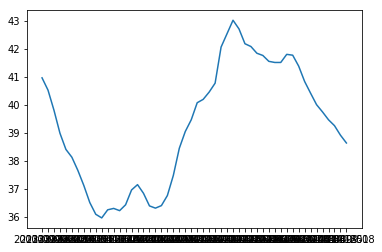

In [260]:
Price_df = comparison_df["Price"]

plt.plot(Price_df)

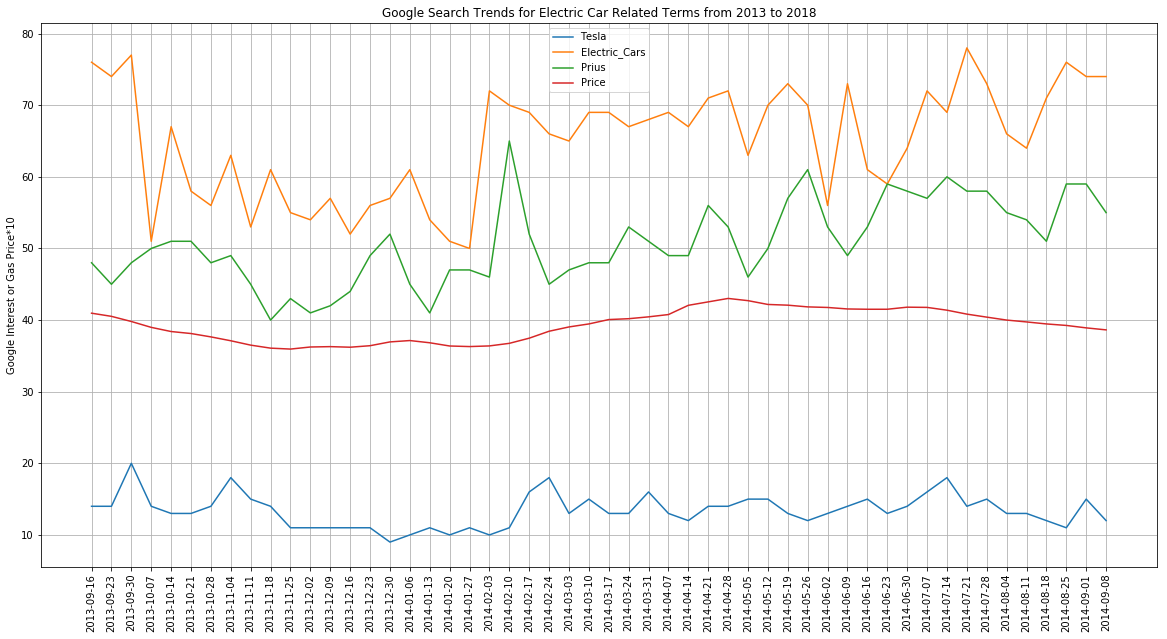

In [261]:
plt.figure(figsize=(20,10))
plt.plot(comparison_df["Tesla"])
plt.plot(comparison_df["Electric_Cars"])
plt.plot(comparison_df["Prius"])
plt.plot(comparison_df["Price"])
plt.title("Google Search Trends for Electric Car Related Terms from 2013 to 2018")
plt.ylabel("Google Interest or Gas Price*10")
plt.xticks(rotation=90)
plt.legend()
#plt.savefig("Images/1314/trends_gasprice_comparison.png")
plt.grid()
plt.show()

In [262]:
#do a rolling average over the 5-year trends data to normalize the spikes for a better visual

from numpy import convolve
 
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

rolling_prius = movingaverage(prius_list,5)

rolling_ecar = movingaverage(ecar_list,5)

rolling_tesla = movingaverage(tesla_list, 5)

In [263]:
#remove first value from gas_list so there are the same amt of values

weekly_gas_prices_rolled = weekly_gas_prices_1314.iloc[4:]
weekly_gas_prices_rolled.head()

,Price
Date,
2013-10-14,3.840
2013-10-21,3.812
2013-10-28,3.765
2013-11-04,3.711
2013-11-11,3.650


In [264]:
#save the gas price values into a list
rolled_gas_array = weekly_gas_prices_rolled["Price"].values
rolled_gas_list = np.ndarray.tolist(rolled_gas_array)
len(rolled_gas_list)

48

In [265]:
rolling_comparison_df = weekly_gas_prices_rolled.assign(Tesla = rolling_tesla, Electric_Cars = rolling_ecar, Prius = rolling_prius)

rolling_comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2013-10-14,3.840,15.0,69.0,48.4
2013-10-21,3.812,14.8,65.4,49.0
2013-10-28,3.765,14.8,61.8,49.6
2013-11-04,3.711,14.4,59.0,49.8
2013-11-11,3.650,14.6,59.4,48.8


In [266]:
rolling_comparison_df['Price'] = rolling_comparison_df['Price']*10
rolling_comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
2013-10-14,38.40,15.0,69.0,48.4
2013-10-21,38.12,14.8,65.4,49.0
2013-10-28,37.65,14.8,61.8,49.6
2013-11-04,37.11,14.4,59.0,49.8
2013-11-11,36.50,14.6,59.4,48.8


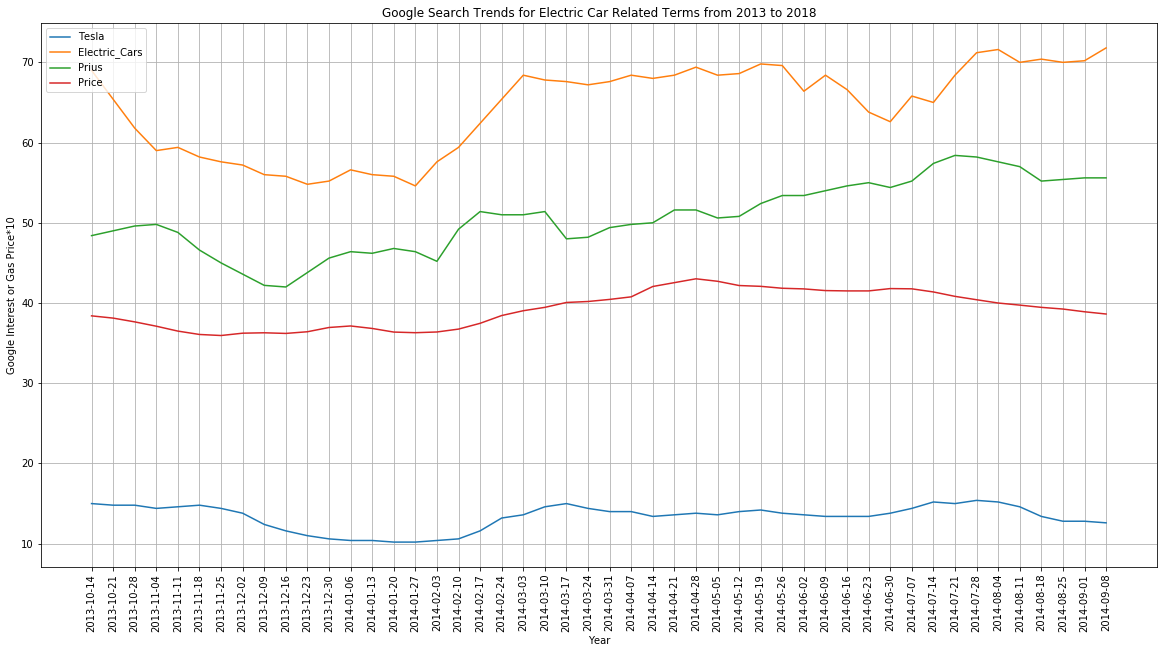

In [267]:
plt.figure(figsize=(20,10))
plt.plot(rolling_comparison_df["Tesla"])
plt.plot(rolling_comparison_df["Electric_Cars"])
plt.plot(rolling_comparison_df["Prius"])
plt.plot(rolling_comparison_df["Price"])

plt.title("Google Search Trends for Electric Car Related Terms from 2013 to 2018")
plt.xlabel("Year")
plt.ylabel("Google Interest or Gas Price*10")
plt.legend()
plt.xticks(rotation=90)
#plt.savefig("Images/1314/trends_gasprice_rollingcomparison.png")
plt.grid()
plt.show()

In [268]:
#STATISTICAL ANALYSIS

#compare gas price line (independant variable) with each google search result (dependent variables)

#OPTION 1: Create scatter plot for x=gas price y=trend
#          Calculate line of best fit
#          Try it with Prius first

In [234]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(rolled_gas_list, rolling_prius)



In [235]:
print("y=", slope, "* x +", intercept)
print("   ")
print("r-squared:", r_value**2)
print("r-value:", r_value)
print("p-value:", p_value)
print("standard error:", std_err)

y= 12.949664249198312 * x + -0.1172102826787409
   
r-squared: 0.4532001394121735
r-value: 0.6732014107324594
p-value: 1.5840959167034354e-07
standard error: 2.097243093089857


Text(0,0.5,'Google Searches')

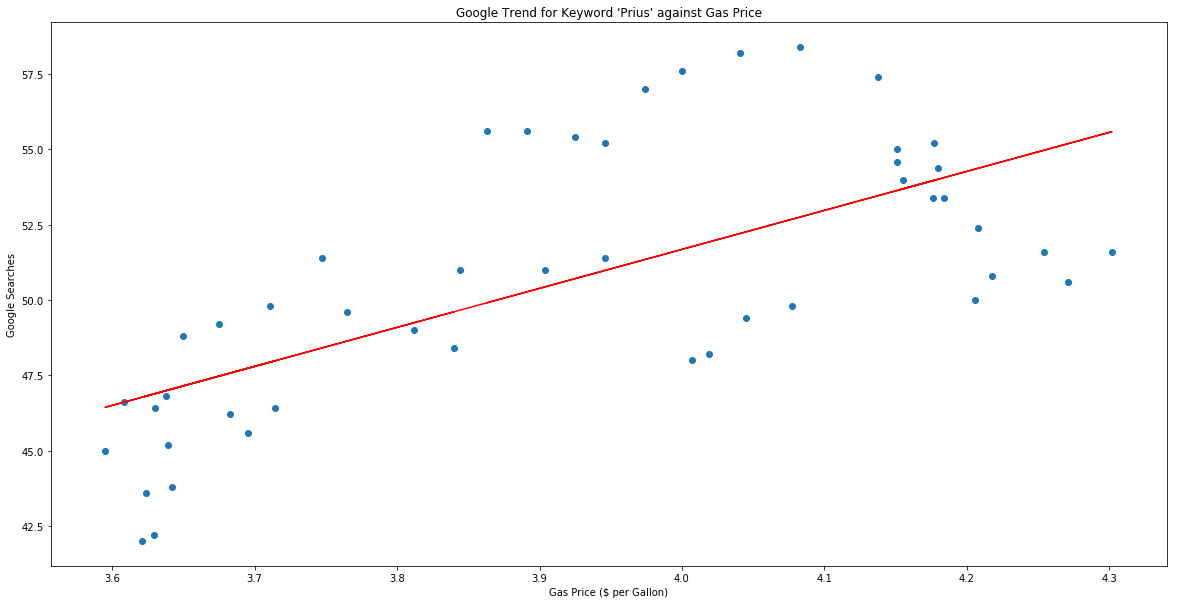

In [236]:
#scatter plot of gas prices v. prius searches

plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_prius, alpha=1)
plt.plot(rolled_gas_list, intercept + slope*(rolling_comparison_df["Price"] / 10), 'r', label='fitted line')
plt.title("Google Trend for Keyword 'Prius' against Gas Price")
plt.xlabel("Gas Price ($ per Gallon)")
plt.ylabel("Google Searches")
#plt.savefig("Images/1314/gasprice_rollingprius_scatter.png")

In [237]:
#try shifting prius data by subtracting 2 from front of list; subtract two from back of gas list to match value counts


In [238]:
slope, intercept, r_value, p_value, std_err = stats.linregress(rolled_gas_list, rolling_ecar)


In [239]:
print("y=", slope, "* x +", intercept)
print("   ")
print("r-squared:", r_value**2)
print("r-value:", r_value)
print("p-value:", p_value)
print("standard error:", std_err)

y= 19.039555664513653 * x + -10.326510668069858
   
r-squared: 0.5970087286315495
r-value: 0.7726633993088773
p-value: 1.2476577145073658e-10
standard error: 2.306403945770196


Text(0,0.5,'Google Searches')

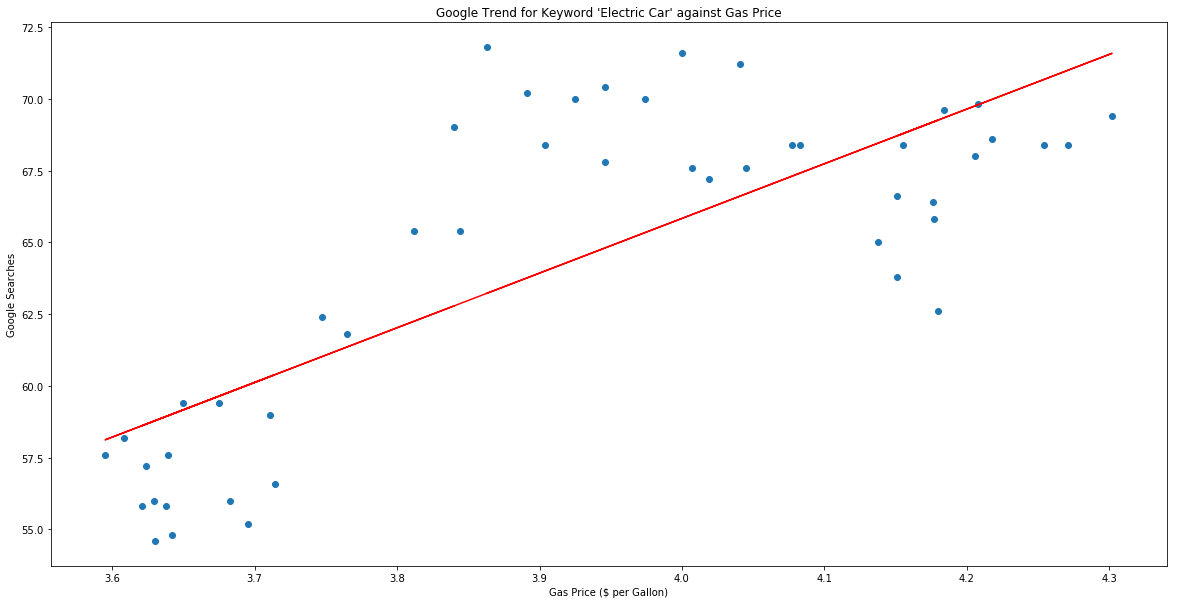

In [240]:
plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_ecar, alpha=1)
plt.plot(rolled_gas_list, intercept + slope*(rolling_comparison_df["Price"] / 10), 'r', label='fitted line')
plt.title("Google Trend for Keyword 'Electric Car' against Gas Price")
plt.xlabel("Gas Price ($ per Gallon)")
plt.ylabel("Google Searches")
#plt.savefig("Images/1314/gasprice_rollingecar_scatter.png")

In [241]:

slope, intercept, r_value, p_value, std_err = stats.linregress(rolled_gas_list, rolling_tesla)


In [242]:
print("y= (", slope, "* x) +", intercept)
print("   ")
print("r-squared:", r_value**2)
print("r-value:", r_value)
print("p-value:", p_value)
print("standard error:", std_err)

y= ( 3.3357777574296295 * x) + 0.2547186261008836
   
r-squared: 0.23883018193808525
r-value: 0.48870254955144776
p-value: 0.0004245910310191667
standard error: 0.8780401344801678


Text(0,0.5,'Google Searches')

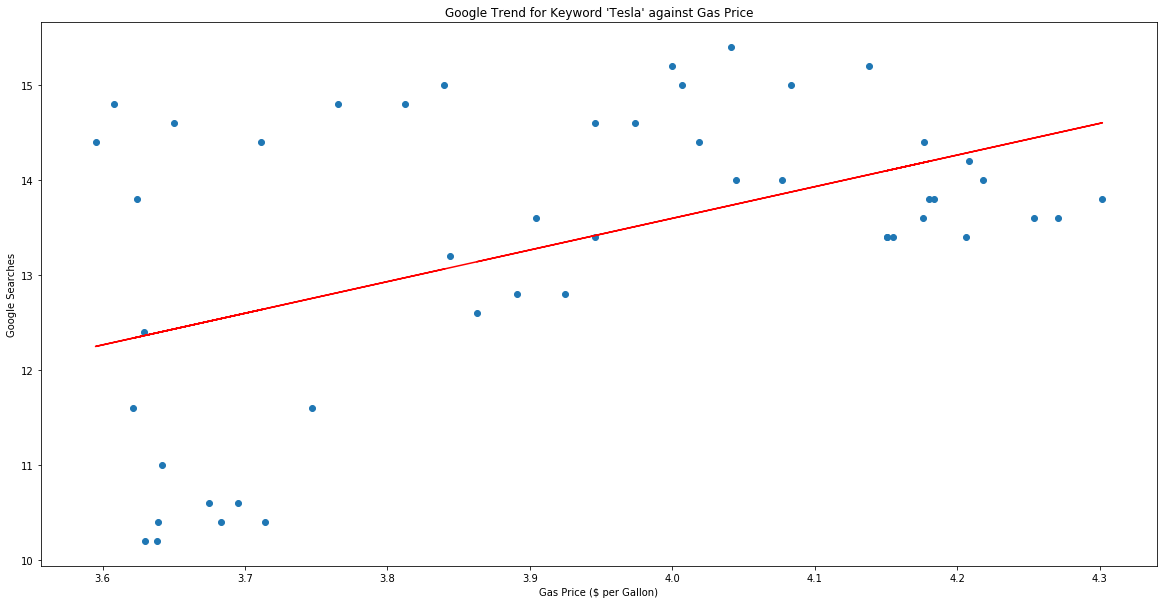

In [243]:
plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_comparison_df["Tesla"], alpha=1)
plt.plot(rolled_gas_list, intercept + slope*(rolling_comparison_df["Price"] / 10), 'r', label='fitted line')
plt.title("Google Trend for Keyword 'Tesla' against Gas Price")
plt.xlabel("Gas Price ($ per Gallon)")
plt.ylabel("Google Searches")
#plt.savefig("Images/1314/gasprice_rollingtesla_scatter.png")